In [3]:
#importing data from google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#importing all required libraries numpy: mathematical operations, Pandas: dataframes, Matplotlib and seaborn : Visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#laoding data by giving drive path and loading into df 
df = pd.read_csv("/content/drive/MyDrive/train_transaction.csv")

In [ ]:
df.head()#display few records

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape 

(590540, 394)

In [ ]:
df.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [6]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,dist2,D7,D13,D14,D12,D6,D9,D8,V153,V139,...,C9,C10,C11,C12,C13,C1,C2,C14,isFraud,TransactionID
Total,552913.000000,551623.00000,528588.000000,528353.000000,525823.000000,517353.000000,515614.00000,515614.00000,508595.000000,508595.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,93.628374,93.40993,89.509263,89.469469,89.041047,87.606767,87.31229,87.31229,86.123717,86.123717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [ ]:
df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [ ]:
df.corr()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,1.000000,0.014166,0.998280,0.012025,0.010122,-0.019900,-0.010091,-0.023900,-0.000370,0.057213,...,0.250831,0.199285,0.219190,0.223816,0.005893,0.179740,0.103030,0.074034,0.203922,0.162702
isFraud,0.014166,1.000000,0.013103,0.011320,-0.013640,0.003388,0.154151,-0.033580,0.005596,-0.030387,...,-0.021164,-0.021982,-0.023468,-0.024134,-0.000451,-0.005456,-0.002402,-0.005702,-0.019356,-0.014663
TransactionDT,0.998280,0.013103,1.000000,0.011920,0.010625,-0.019202,-0.011222,-0.024132,-0.000051,0.051972,...,0.258603,0.205671,0.226312,0.231072,0.005762,0.184407,0.105783,0.075892,0.210240,0.167524
TransactionAmt,0.012025,0.011320,0.011920,1.000000,-0.005725,0.016136,-0.109785,0.003061,-0.007421,0.028312,...,0.003909,0.024319,0.010808,0.017385,0.078751,0.044830,0.070651,0.129452,0.082064,0.105996
card1,0.010122,-0.013640,0.010625,-0.005725,1.000000,0.004960,0.002965,-0.093633,0.020369,-0.000060,...,0.146483,0.121763,0.133150,0.136557,-0.001903,0.080603,0.050555,0.036052,0.118885,0.091271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V335,0.179740,-0.005456,0.184407,0.044830,0.080603,0.044073,0.000465,-0.209817,0.029812,0.006035,...,0.647561,0.593782,0.647208,0.657350,0.703988,1.000000,0.914130,0.166021,0.552533,0.411911
V336,0.103030,-0.002402,0.105783,0.070651,0.050555,0.029899,-0.001279,-0.139576,0.019343,0.004541,...,0.412448,0.389508,0.410970,0.425812,0.906312,0.914130,1.000000,0.118221,0.353950,0.274392
V337,0.074034,-0.005702,0.075892,0.129452,0.036052,0.017705,0.001361,-0.076374,0.011272,0.001554,...,0.245626,0.309989,0.259108,0.295698,0.041888,0.166021,0.118221,1.000000,0.742652,0.907378
V338,0.203922,-0.019356,0.210240,0.082064,0.118885,0.055566,0.001970,-0.233342,0.034816,0.003999,...,0.780555,0.752075,0.800310,0.823754,0.054911,0.552533,0.353950,0.742652,1.000000,0.940009


In [ ]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


TransactionID    -3.024053e-16
isFraud           5.061223e+00
TransactionDT     1.311547e-01
TransactionAmt    1.437449e+01
card1            -4.092898e-02
                      ...     
V335              5.414242e+01
V336              1.187230e+02
V337              8.577117e+01
V338              2.364451e+01
V339              4.891002e+01
Length: 380, dtype: float64

In [ ]:
df.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

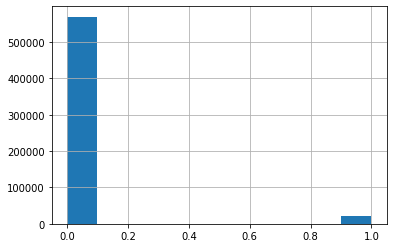

In [ ]:
df.isFraud.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


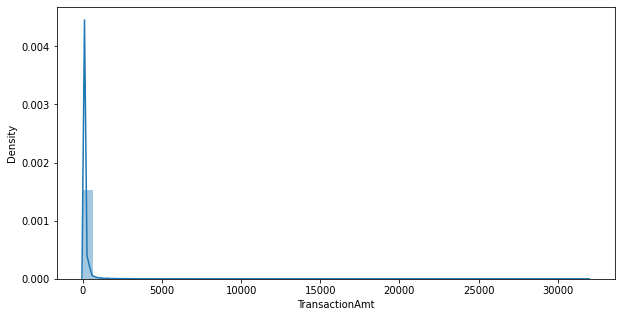

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['TransactionAmt'])
plt.show()

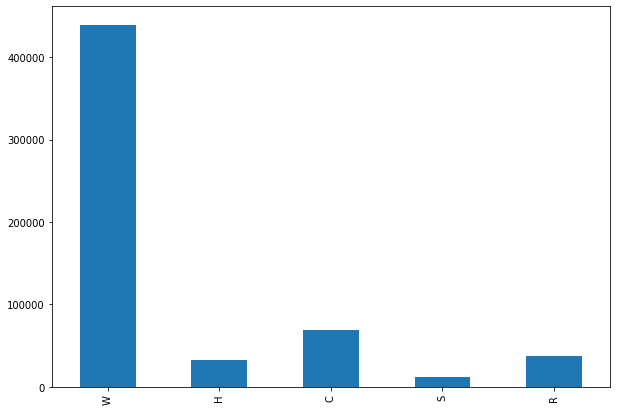

In [ ]:
plt.figure(figsize=(10,7))
count_classes = pd.value_counts(df['ProductCD'], sort = False)
count_classes.plot (kind='bar')
plt.show()

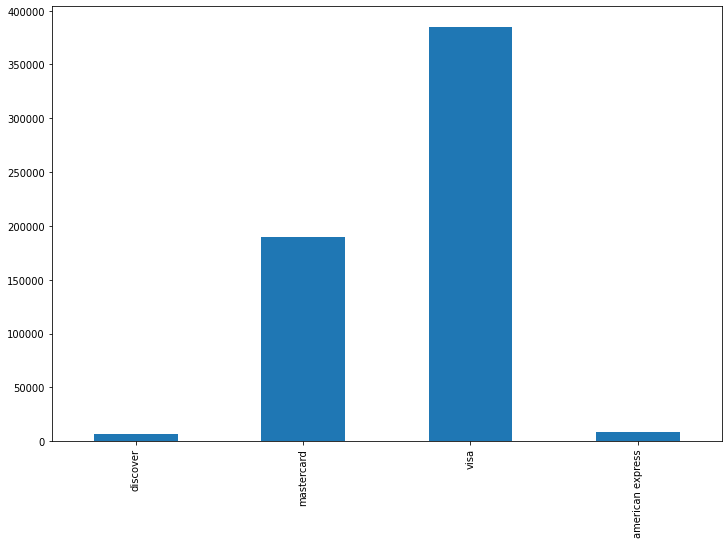

In [ ]:
plt.figure(figsize=(12,8))
count_classes = pd.value_counts(df['card4'], sort = False)
count_classes.plot (kind='bar')
plt.show()

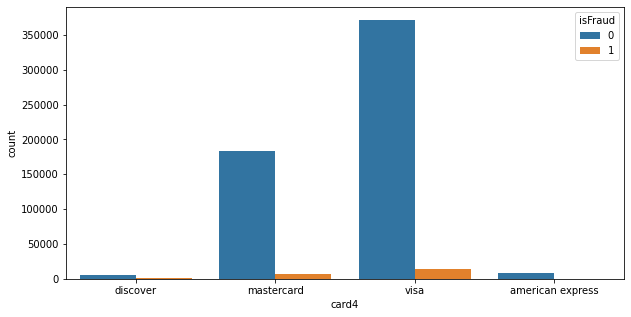

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x = "card4", data=df, hue = "isFraud") 
plt.show()

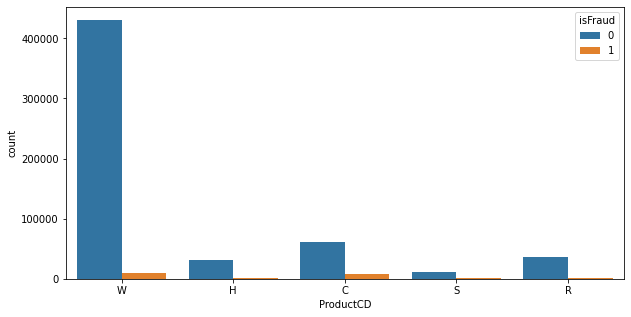

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x = "ProductCD", data=df, hue = "isFraud") 
plt.show()

In [ ]:
df['ProductCD'].value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

In [ ]:
df['card4'].value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

In [7]:
for i in df.columns:
    if df[i].isnull().sum() / len(df) * 100 > 80:
#         print(i)
        df.drop(i, inplace = True, axis = 1)

In [8]:
for i in df.columns:
    df[i] = df[i].fillna(df[i].mode()[0])

In [ ]:
df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,...,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,361.926886,153.186458,199.471611,291.653527,86.822813,...,39.173114,21.305592,43.226087,26.749372,109.816313,247.601710,162.150103,18.372102,42.072278,28.326009
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,156.677363,11.322604,41.157610,95.949345,2.537300,...,172.126681,95.804974,173.443984,116.734202,2270.010192,3980.002546,2793.315350,332.301482,473.494534,382.049311
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,215.000000,150.000000,166.000000,205.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,360.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,327.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55125.000000,4817.470215,7519.870117,4817.470215,93736.000000,134021.000000,98476.000000,104060.000000,104060.000000,104060.000000


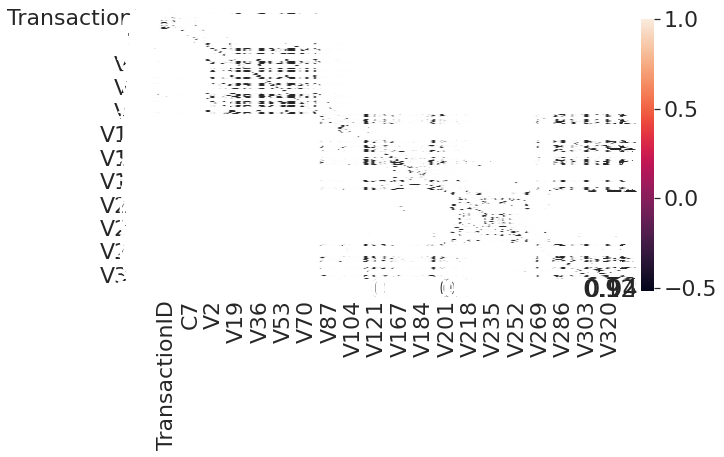

In [ ]:
##Correlation plot
plt.subplots(figsize=(10,5))
sns.set(font_scale=2)
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df.shape

(590540, 339)

In [9]:
correlation = df.corr()

In [10]:
correlation_val = correlation['isFraud'].sort_values(ascending = False)
correlation_val

isFraud    1.000000
V257       0.280214
V246       0.268090
V244       0.265712
V242       0.263476
             ...   
V91       -0.098592
V70       -0.099106
V69       -0.102396
V90       -0.102635
V29       -0.102738
Name: isFraud, Length: 325, dtype: float64

# Label encoding (Converting all Categorical values into nummericals)



In [11]:
l = []
for i in range (len(correlation_val)):
    if correlation_val[i] > 0:
        l.append(correlation_val.index[i])

In [12]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import math
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [13]:
enconder = LabelEncoder()
o = []
for i in df.columns:
    if df.dtypes[i] == 'O':
        o.append(i)
o

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [14]:
for i in o:
    df[i] = enconder.fit_transform(df[i])

In [ ]:
df.shape

(590540, 339)

In [15]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [16]:

scaler =RobustScaler()
amount = df.TransactionAmt
df.Amount = scaler.fit_transform(np.array(amount).reshape(-1,1))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


0    0.96501
1    0.03499
Name: isFraud, dtype: float64
0    569877
1     20663
Name: isFraud, dtype: int64


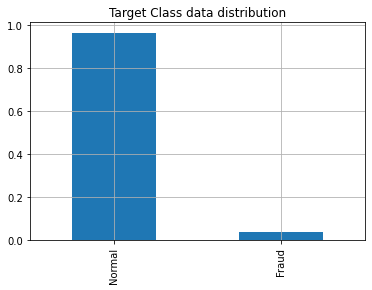

In [21]:
df.isFraud.value_counts(normalize=True).plot(kind='bar')
plt.xticks([0,1],['Normal','Fraud'])
plt.title('Target Class data distribution')
plt.grid()
print(df.isFraud.value_counts(normalize=True))
print(df.isFraud.value_counts())

# Sampling Methods

In [17]:
train_idx = math.ceil(len(df) * 0.8)
test_idx = math.ceil(len(df) * 0.2)
print(train_idx,test_idx)

472432 118108


In [18]:
train = df[:train_idx]
test  = df[-test_idx:]
print(train.shape,test.shape)

(472432, 339) (118108, 339)


In [19]:
x_train = train.drop('isFraud',axis=1)
y_train = train.isFraud
print(x_train.shape,y_train.shape)

(472432, 338) (472432,)


In [20]:
x_test = test.drop('isFraud',axis=1)
y_test = test.isFraud
print(x_test.shape,y_test.shape)

(118108, 338) (118108,)


In [21]:
oversample = SMOTE(random_state=0)
undersample = RandomUnderSampler(random_state=0)


#Oversampling

In [22]:
x_train_over,y_train_over = oversample.fit_resample(x_train,y_train)
print(x_train_over.shape,y_train_over.shape)

(911666, 338) (911666,)


0    0.5
1    0.5
Name: isFraud, dtype: float64
0    455833
1    455833
Name: isFraud, dtype: int64


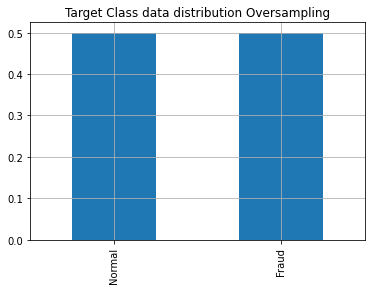

In [23]:
y_train_over.value_counts(normalize=True).plot(kind='bar')
plt.xticks([0,1],['Normal','Fraud'])
plt.title('Target Class data distribution Oversampling')
plt.grid()
print(y_train_over.value_counts(normalize=True))
print(y_train_over.value_counts())

# Model building for oversampling data

In [24]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#Importing all machine learining packages
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier



#output performance metrices
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



# from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold

In [30]:
classifier = LogisticRegression() # importing logistic regression and storing in variable Classifier
classifier.fit(x_train_over,y_train_over) #fitting the train and test data into the model
y_lr=classifier.predict(x_test) #finding the predictions using X_test values

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


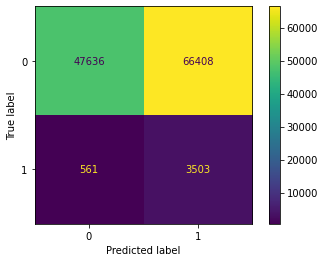

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier,x_test,y_test)
plt.show() 

In [32]:
print('Confusion Matrix \n',confusion_matrix(y_lr,y_test)) # confusion matrix is for finding the misclassification in the data, using predicted values and y_test values
print()
print('Accuracy Score \n', accuracy_score(y_lr,y_test)) #Accurcy score for predicted values and y_test values
print()
print('Classification Report \n',classification_report(y_lr,y_test)) #classification report for preidicted values and y_test values

Confusion Matrix 
 [[47636   561]
 [66408  3503]]

Accuracy Score 
 0.4329850645172215

Classification Report 
               precision    recall  f1-score   support

           0       0.42      0.99      0.59     48197
           1       0.86      0.05      0.09     69911

    accuracy                           0.43    118108
   macro avg       0.64      0.52      0.34    118108
weighted avg       0.68      0.43      0.30    118108



In [33]:
#comparing the actual vs predicted values
y_pred = classifier.predict(x_test).reshape(x_test.shape[0],)
pred_df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred}).astype('int64') 

print(pred_df.head(10))

from sklearn.metrics import mean_absolute_error

MAE_val = mean_absolute_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value'])

        Actual value  Predicted value
472432             1                1
472433             0                1
472434             0                1
472435             0                1
472436             0                1
472437             0                1
472438             0                1
472439             0                0
472440             0                0
472441             0                1


In [ ]:
classifier2 = XGBClassifier()
classifier2.fit(x_train_over,y_train_over)
y_xg=classifier2.predict(x_test)

print('Confusion Matrix \n',confusion_matrix(y_xg,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_xg,y_test))
print()
print('Classification Report \n',classification_report(y_xg,y_test))

Confusion Matrix 
 [[109601   2312]
 [  4443   1752]]

Accuracy Score 
 0.9428065838046533

Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97    111913
           1       0.43      0.28      0.34      6195

    accuracy                           0.94    118108
   macro avg       0.70      0.63      0.66    118108
weighted avg       0.93      0.94      0.94    118108



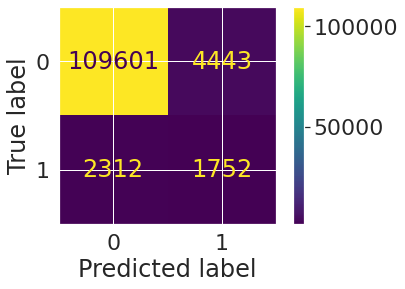

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier2,x_test,y_test)
plt.show()

In [ ]:
y_pred = classifier2.predict(x_test).reshape(x_test.shape[0],)
pred_df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred}).astype('int64')

print(pred_df.head(10))

from sklearn.metrics import mean_absolute_error

MAE_val = mean_absolute_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value'])

        Actual value  Predicted value
472432             1                0
472433             0                0
472434             0                0
472435             0                0
472436             0                0
472437             0                0
472438             0                0
472439             0                0
472440             0                0
472441             0                0


In [ ]:
classifier3 = RandomForestClassifier()
classifier3.fit(x_train_over,y_train_over)
y_rfc=classifier3.predict(x_test)
print('Confusion Matrix \n',confusion_matrix(y_rfc,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_rfc,y_test))
print()
print('Classification Report \n',classification_report(y_rfc,y_test))

Confusion Matrix 
 [[113759   2792]
 [   285   1272]]

Accuracy Score 
 0.9739475734073898

Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    116551
           1       0.31      0.82      0.45      1557

    accuracy                           0.97    118108
   macro avg       0.66      0.90      0.72    118108
weighted avg       0.99      0.97      0.98    118108



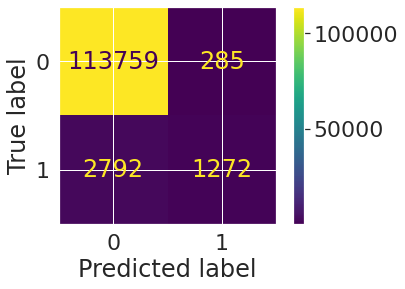

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier3,x_test,y_test)
plt.show()

In [ ]:
y_pred = classifier3.predict(x_test).reshape(x_test.shape[0],)
pred_df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred}).astype('int64')

print(pred_df.head(10))

from sklearn.metrics import mean_absolute_error

MAE_val = mean_absolute_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value'])

        Actual value  Predicted value
472432             1                0
472433             0                0
472434             0                0
472435             0                0
472436             0                0
472437             0                0
472438             0                0
472439             0                0
472440             0                0
472441             0                0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier4 = DecisionTreeClassifier(random_state=0)

In [ ]:
classifier4.fit(x_train_over,y_train_over)
y_dc=classifier4.predict(x_test)
print('Confusion Matrix \n',confusion_matrix(y_dc,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_dc,y_test))
print()
print('Classification Report \n',classification_report(y_dc,y_test))

Confusion Matrix 
 [[105435   2466]
 [  8609   1598]]

Accuracy Score 
 0.9062298912859417

Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95    107901
           1       0.39      0.16      0.22     10207

    accuracy                           0.91    118108
   macro avg       0.66      0.57      0.59    118108
weighted avg       0.88      0.91      0.89    118108



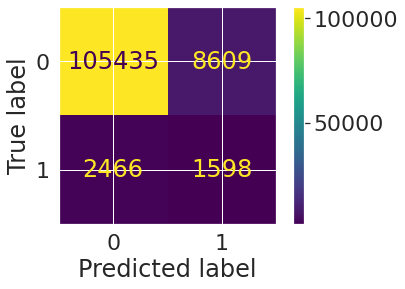

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier4,x_test,y_test)
plt.show()

In [ ]:
y_pred = classifier4.predict(x_test).reshape(x_test.shape[0],)
pred_df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred}).astype('int64')

print(pred_df.head(10))

from sklearn.metrics import mean_absolute_error

MAE_val = mean_absolute_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value'])

        Actual value  Predicted value
472432             1                0
472433             0                0
472434             0                0
472435             0                1
472436             0                0
472437             0                0
472438             0                1
472439             0                0
472440             0                0
472441             0                0


In [25]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [26]:
classifier5=LinearSVC()
classifier5.fit(x_train_over,y_train_over)
y_svm=classifier5.predict(x_test)
print('Confusion Matrix \n',confusion_matrix(y_svm,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_svm,y_test))
print()
print('Classification Report \n',classification_report(y_svm,y_test))


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Confusion Matrix 
 [[  6369     31]
 [107675   4033]]

Accuracy Score 
 0.08807193416195347

Classification Report 
               precision    recall  f1-score   support

           0       0.06      1.00      0.11      6400
           1       0.99      0.04      0.07    111708

    accuracy                           0.09    118108
   macro avg       0.52      0.52      0.09    118108
weighted avg       0.94      0.09      0.07    118108



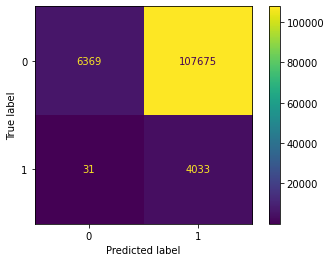

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier5,x_test,y_test)
plt.show()

In [28]:
y_pred = classifier5.predict(x_test).reshape(x_test.shape[0],)
pred_df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred}).astype('int64')

print(pred_df.head(10))

from sklearn.metrics import mean_absolute_error

MAE_val = mean_absolute_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value'])

        Actual value  Predicted value
472432             1                1
472433             0                1
472434             0                1
472435             0                1
472436             0                1
472437             0                1
472438             0                1
472439             0                0
472440             0                1
472441             0                1


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [65]:
classifier6=GaussianNB()
classifier6.fit(x_train_over,y_train_over)
y_nb=classifier6.predict(x_test)
print('Confusion Matrix \n',confusion_matrix(y_nb,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_nb,y_test))
print()
print('Classification Report \n',classification_report(y_nb,y_test))


Confusion Matrix 
 [[27277   390]
 [86767  3674]]

Accuracy Score 
 0.2620567616080198

Classification Report 
               precision    recall  f1-score   support

           0       0.24      0.99      0.38     27667
           1       0.90      0.04      0.08     90441

    accuracy                           0.26    118108
   macro avg       0.57      0.51      0.23    118108
weighted avg       0.75      0.26      0.15    118108



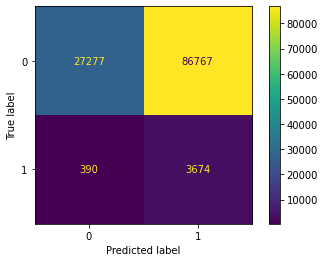

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier6,x_test,y_test)
plt.show()

In [67]:
y_pred = classifier6.predict(x_test).reshape(x_test.shape[0],)
pred_df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred}).astype('int64')

print(pred_df.head(10))

from sklearn.metrics import mean_absolute_error

MAE_val = mean_absolute_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value'])

        Actual value  Predicted value
472432             1                1
472433             0                1
472434             0                1
472435             0                1
472436             0                1
472437             0                1
472438             0                1
472439             0                0
472440             0                0
472441             0                1


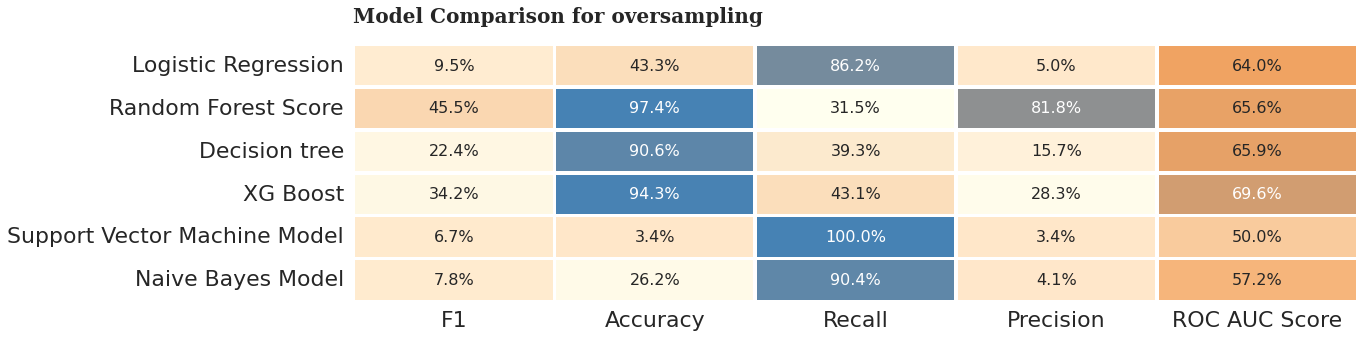

In [ ]:
lr_df = pd.DataFrame(data=[f1_score(y_test,y_lr),accuracy_score(y_test, y_lr), recall_score(y_test, y_lr), precision_score(y_test, y_lr), roc_auc_score(y_test, y_lr)], 
             columns=['Logistic Regression'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
rf_df = pd.DataFrame(data=[f1_score(y_test,y_rfc),accuracy_score(y_test, y_rfc), recall_score(y_test, y_rfc),precision_score(y_test, y_rfc), roc_auc_score(y_test, y_rfc)], 
             columns=['Random Forest Score'],index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
dt_df = pd.DataFrame(data=[f1_score(y_test,y_dc),accuracy_score(y_test, y_dc), recall_score(y_test, y_dc), precision_score(y_test, y_dc), roc_auc_score(y_test, y_dc)], 
             columns=['Decision tree'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

xg_df = pd.DataFrame(data=[f1_score(y_test,y_xg),accuracy_score(y_test, y_xg), recall_score(y_test, y_xg), precision_score(y_test, y_xg), roc_auc_score(y_test, y_xg)], 
             columns=['XG Boost'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
svm_df=pd.DataFrame(data=[f1_score(y_test,y_svm),accuracy_score(y_test, y_svm), recall_score(y_test, y_svm), precision_score(y_test, y_svm), roc_auc_score(y_test, y_svm)], 
             columns=['Support Vector Machine Model'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
nb_df=pd.DataFrame(data=[f1_score(y_test,y_nb),accuracy_score(y_test, y_nb), recall_score(y_test, y_nb), precision_score(y_test, y_nb), roc_auc_score(y_test, y_nb)], 
             columns=['Naive Bayes Model'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])


df_models = round(pd.concat([lr_df,rf_df,dt_df,xg_df,svm_df,nb_df], axis=1),3)
#colors = ["bisque","ivory","sandybrown"]
colors = ["bisque","ivory","sandybrown","steelblue"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "white"

fig = plt.figure(figsize=(10,15)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":16})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(0,-0.5,'Model Comparison for oversampling',fontsize=20,fontweight='bold',fontfamily='serif')
plt.show()

# Model Building for Undersampling data

In [29]:
x_train_under, y_train_under = undersample.fit_resample(x_train,y_train)
print(x_train_under.shape, y_train_under.shape)

(33198, 338) (33198,)


0    0.5
1    0.5
Name: isFraud, dtype: float64
0    16599
1    16599
Name: isFraud, dtype: int64


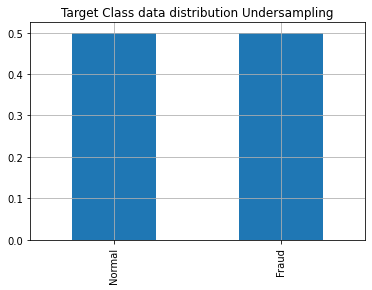

In [30]:
y_train_under.value_counts(normalize=True).plot(kind='bar')
plt.xticks([0,1],['Normal','Fraud'])
plt.title('Target Class data distribution Undersampling')
plt.grid()
print(y_train_under.value_counts(normalize=True))
print(y_train_under.value_counts())

##Model Building

In [36]:
classifier = LogisticRegression() # importing logistic regression and storing in variable Classifier
classifier.fit(x_train_under,y_train_under) #fitting the train and test data into the model
y_lr1=classifier.predict(x_test) #finding the predictions using X_test values

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [37]:
print('Confusion Matrix \n',confusion_matrix(y_lr1,y_test)) # confusion matrix is for finding the misclassification in the data, using predicted values and y_test values
print()
print('Accuracy Score \n', accuracy_score(y_lr1,y_test)) #Accurcy score for predicted values and y_test values
print()
print('Classification Report \n',classification_report(y_lr1,y_test)) #classification report for preidicted values and y_test values

Confusion Matrix 
 [[44738   492]
 [69306  3572]]

Accuracy Score 
 0.4090324110136485

Classification Report 
               precision    recall  f1-score   support

           0       0.39      0.99      0.56     45230
           1       0.88      0.05      0.09     72878

    accuracy                           0.41    118108
   macro avg       0.64      0.52      0.33    118108
weighted avg       0.69      0.41      0.27    118108



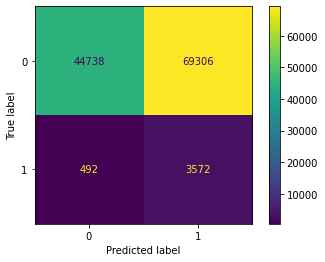

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
a=ConfusionMatrixDisplay.from_estimator(classifier,x_test,y_test)
plt.show()

In [39]:
classifier_xg = XGBClassifier()
classifier_xg.fit(x_train_under,y_train_under)
y_xg1=classifier_xg.predict(x_test)

print('Confusion Matrix \n',confusion_matrix(y_xg1,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_xg1,y_test))
print()
print('Classification Report \n',classification_report(y_xg1,y_test))

Confusion Matrix 
 [[93478   954]
 [20566  3110]]

Accuracy Score 
 0.8177938835641955

Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     94432
           1       0.77      0.13      0.22     23676

    accuracy                           0.82    118108
   macro avg       0.79      0.56      0.56    118108
weighted avg       0.81      0.82      0.76    118108



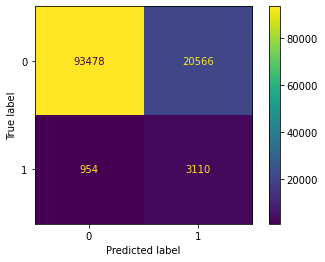

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier_xg,x_test,y_test)
plt.show()

In [42]:
y_pred = classifier_xg.predict(x_test).reshape(x_test.shape[0],)
pred_df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred}).astype('int64')

print(pred_df.head(10))

from sklearn.metrics import mean_absolute_error

MAE_val = mean_absolute_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value'])

        Actual value  Predicted value
472432             1                0
472433             0                0
472434             0                1
472435             0                1
472436             0                0
472437             0                0
472438             0                0
472439             0                0
472440             0                0
472441             0                0


In [43]:
classifier_rf = RandomForestClassifier()
classifier_rf.fit(x_train_under,y_train_under)
y_rfc1=classifier_rf.predict(x_test)
print('Confusion Matrix \n',confusion_matrix(y_rfc1,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_rfc1,y_test))
print()
print('Classification Report \n',classification_report(y_rfc1,y_test))

Confusion Matrix 
 [[98296   972]
 [15748  3092]]

Accuracy Score 
 0.8584346530294307

Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     99268
           1       0.76      0.16      0.27     18840

    accuracy                           0.86    118108
   macro avg       0.81      0.58      0.60    118108
weighted avg       0.85      0.86      0.82    118108



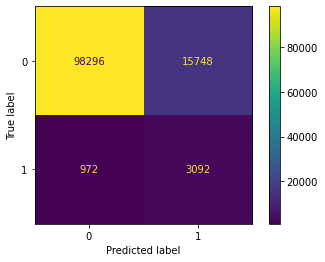

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier_rf,x_test,y_test)
plt.show()

In [46]:
y_pred = classifier_rf.predict(x_test).reshape(x_test.shape[0],)
pred_df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred}).astype('int64')

print(pred_df.head(10))

from sklearn.metrics import mean_absolute_error

MAE_val = mean_absolute_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value'])

        Actual value  Predicted value
472432             1                0
472433             0                0
472434             0                1
472435             0                1
472436             0                0
472437             0                0
472438             0                0
472439             0                0
472440             0                0
472441             0                0


In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
classifier_dt = DecisionTreeClassifier(random_state=0)

In [49]:
classifier_dt.fit(x_train_under,y_train_under)
y_dc1=classifier_dt.predict(x_test)
print('Confusion Matrix \n',confusion_matrix(y_dc1,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_dc1,y_test))
print()
print('Classification Report \n',classification_report(y_dc1,y_test))

Confusion Matrix 
 [[82129  1307]
 [31915  2757]]

Accuracy Score 
 0.7187150743387408

Classification Report 
               precision    recall  f1-score   support

           0       0.72      0.98      0.83     83436
           1       0.68      0.08      0.14     34672

    accuracy                           0.72    118108
   macro avg       0.70      0.53      0.49    118108
weighted avg       0.71      0.72      0.63    118108



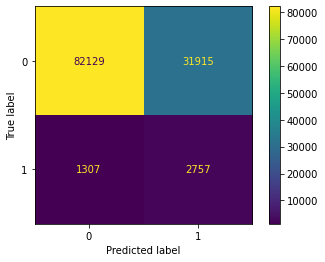

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier_dt,x_test,y_test)
plt.show()

In [51]:
y_pred = classifier_dt.predict(x_test).reshape(x_test.shape[0],)
pred_df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred}).astype('int64')

print(pred_df.head(10))

from sklearn.metrics import mean_absolute_error

MAE_val = mean_absolute_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value'])

        Actual value  Predicted value
472432             1                1
472433             0                0
472434             0                1
472435             0                1
472436             0                0
472437             0                0
472438             0                0
472439             0                0
472440             0                0
472441             0                1


In [52]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [31]:
classifier_svm=LinearSVC()
classifier_svm.fit(x_train_under,y_train_under)
y_svm1=classifier_svm.predict(x_test)
print('Confusion Matrix \n',confusion_matrix(y_svm1,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_svm1,y_test))
print()
print('Classification Report \n',classification_report(y_svm1,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Confusion Matrix 
 [[112608   4056]
 [  1436      8]]

Accuracy Score 
 0.9535001862701934

Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    116664
           1       0.00      0.01      0.00      1444

    accuracy                           0.95    118108
   macro avg       0.49      0.49      0.49    118108
weighted avg       0.98      0.95      0.96    118108



In [53]:
classifier_svm=SVC()
classifier_svm.fit(x_train_under,y_train_under)
y_svm1=classifier_svm.predict(x_test)
print('Confusion Matrix \n',confusion_matrix(y_svm1,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_svm1,y_test))
print()
print('Classification Report \n',classification_report(y_svm1,y_test))

Confusion Matrix 
 [[19090   847]
 [94954  3217]]

Accuracy Score 
 0.1888695092627087

Classification Report 
               precision    recall  f1-score   support

           0       0.17      0.96      0.28     19937
           1       0.79      0.03      0.06     98171

    accuracy                           0.19    118108
   macro avg       0.48      0.50      0.17    118108
weighted avg       0.69      0.19      0.10    118108



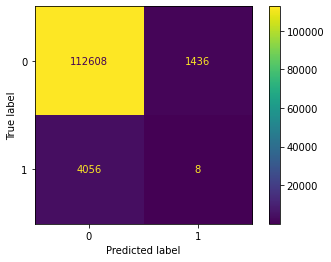

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier_svm,x_test,y_test)
plt.show()

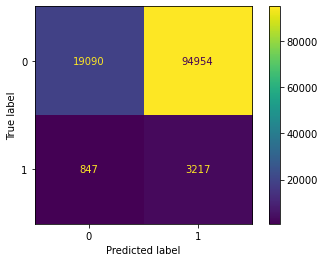

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier_svm,x_test,y_test)
plt.show()

In [55]:
y_pred = classifier_svm.predict(x_test).reshape(x_test.shape[0],)
pred_df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred}).astype('int64')

print(pred_df.head(10))

from sklearn.metrics import mean_absolute_error

MAE_val = mean_absolute_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value'])

        Actual value  Predicted value
472432             1                1
472433             0                1
472434             0                1
472435             0                1
472436             0                1
472437             0                1
472438             0                1
472439             0                1
472440             0                1
472441             0                1


In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
classifier_nb=GaussianNB()
classifier_nb.fit(x_train_under,y_train_under)
y_nb1=classifier_nb.predict(x_test)
print('Confusion Matrix \n',confusion_matrix(y_nb1,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_nb1,y_test))
print()
print('Classification Report \n',classification_report(y_nb1,y_test))

Confusion Matrix 
 [[106371   3202]
 [  7673    862]]

Accuracy Score 
 0.9079232566803265

Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    109573
           1       0.21      0.10      0.14      8535

    accuracy                           0.91    118108
   macro avg       0.57      0.54      0.54    118108
weighted avg       0.88      0.91      0.89    118108



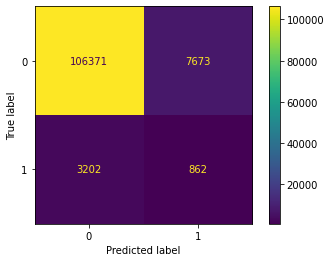

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
b=ConfusionMatrixDisplay.from_estimator(classifier_nb,x_test,y_test)
plt.show()

In [ ]:
y_pred = classifier_nb.predict(x_test).reshape(x_test.shape[0],)
pred_df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred}).astype('int64')

print(pred_df.head(10))

from sklearn.metrics import mean_absolute_error

MAE_val = mean_absolute_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value'])

        Actual value  Predicted value
472432             1                0
472433             0                0
472434             0                0
472435             0                0
472436             0                0
472437             0                0
472438             0                1
472439             0                0
472440             0                1
472441             0                0


Text(0, -0.5, 'Model Comparison for undersampling')

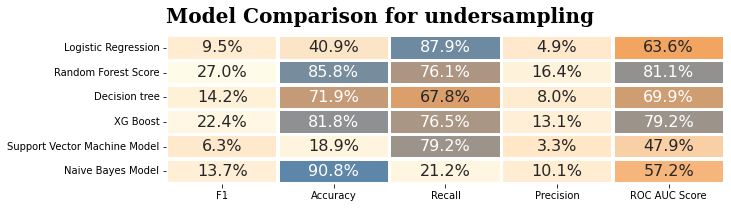

In [59]:
lr_df = pd.DataFrame(data=[f1_score(y_test,y_lr),accuracy_score(y_test, y_lr1), recall_score(y_test, y_lr1), precision_score(y_test, y_lr1), roc_auc_score(y_test, y_lr1)], 
             columns=['Logistic Regression'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
rf_df = pd.DataFrame(data=[f1_score(y_test,y_rfc1),accuracy_score(y_test, y_rfc1), recall_score(y_test, y_rfc1),precision_score(y_test, y_rfc1), roc_auc_score(y_test, y_rfc1)], 
             columns=['Random Forest Score'],index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
dt_df = pd.DataFrame(data=[f1_score(y_test,y_dc1),accuracy_score(y_test, y_dc1), recall_score(y_test, y_dc1), precision_score(y_test, y_dc1), roc_auc_score(y_test, y_dc1)], 
             columns=['Decision tree'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

xg_df = pd.DataFrame(data=[f1_score(y_test,y_xg1),accuracy_score(y_test, y_xg1), recall_score(y_test, y_xg1), precision_score(y_test, y_xg1), roc_auc_score(y_test, y_xg1)], 
             columns=['XG Boost'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
svm_df=pd.DataFrame(data=[f1_score(y_test,y_svm1),accuracy_score(y_test, y_svm1), recall_score(y_test, y_svm1), precision_score(y_test, y_svm1), roc_auc_score(y_test, y_svm1)], 
             columns=['Support Vector Machine Model'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
nb_df=pd.DataFrame(data=[f1_score(y_test,y_nb1),accuracy_score(y_test, y_nb1), recall_score(y_test, y_nb1), precision_score(y_test, y_nb1), roc_auc_score(y_test, y_nb1)], 
             columns=['Naive Bayes Model'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])


df_models = round(pd.concat([lr_df,rf_df,dt_df,xg_df,svm_df,nb_df], axis=1),3)
#colors = ["bisque","ivory","sandybrown"]
colors = ["bisque","ivory","sandybrown","steelblue"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "white"

fig = plt.figure(figsize=(10,15)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":16})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(0,-0.5,'Model Comparison for undersampling',fontsize=20,fontweight='bold',fontfamily='serif')